Goal of this notebook to test different classifiers paramatres for "parent notebook":
[SMS spam detection with various classifiers][1]


  [1]: https://www.kaggle.com/muzzzdy/d/uciml/sms-spam-collection-dataset/sms-spam-detection-with-various-classifiers

Preliminary imports

In [21]:
import numpy as np
import pandas as pd
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

Read&Clean the data

In [22]:
sms = pd.read_csv('../input/spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [23]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We will use only text features without message length for tuning

Clean stem and vectorize our features:

In [24]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [25]:
text_feat = sms['message'].copy()
text_feat = text_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

Now split for fitting and testing our Classifiers:

In [26]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

And import metrics and classifiers:

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Support VectorClassifier

Test kernel and Gamma options

In [28]:
pred_scores = []
krnl = {'rbf' : 'rbf','polynominal' : 'poly', 'sigmoid': 'sigmoid'}
for k,v in krnl.items():
    for i in np.linspace(0.05, 1, num=20):
        svc = SVC(kernel=v, gamma=i)
        svc.fit(features_train, labels_train)
        pred = svc.predict(features_test)
        pred_scores.append((k, [i, accuracy_score(labels_test,pred)]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


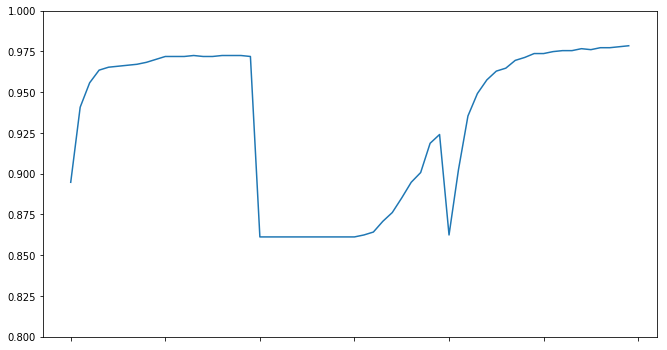

In [29]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Gamma','Score'])
df['Score'].plot(kind='line', figsize=(11,6), ylim=(0.8,1.0))

In [30]:
df[df['Score'] == df['Score'].max()]

,Gamma,Score
sigmoid,1.0,0.978469


### K-Neighbours Classifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


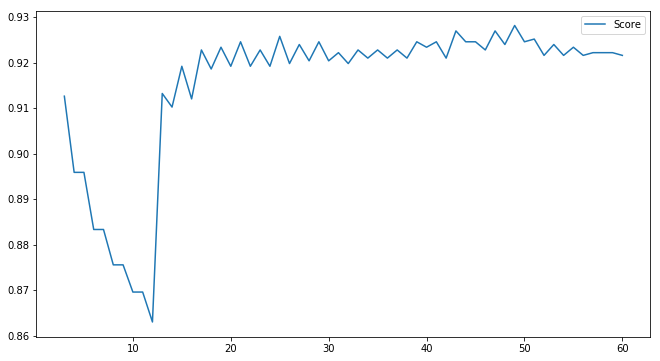

In [31]:
pred_scores = []
for i in range(3,61):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [32]:
df[df['Score'] == df['Score'].max()]

,Score
49,0.92823


### Multinominal NaiveBayes Classifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


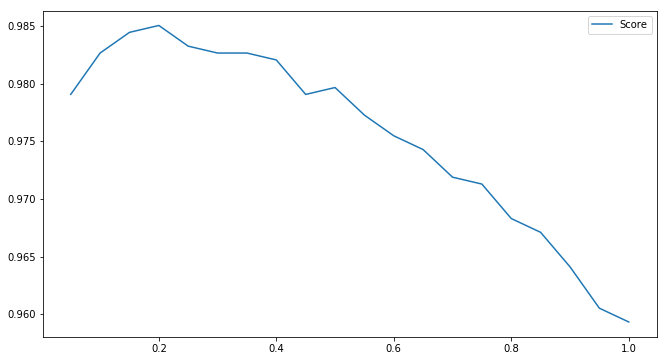

In [33]:
pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    pred = mnb.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [34]:
df[df['Score'] == df['Score'].max()]

,Score
0.2,0.985048


### DecisionTree Classifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


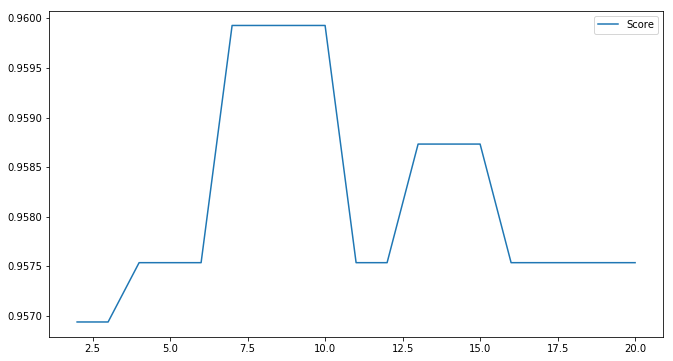

In [35]:
pred_scores = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [36]:
df[df['Score'] == df['Score'].max()]

,Score
7,0.959928
8,0.959928
9,0.959928
10,0.959928


## Ensemble classifiers

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

### RandomForest Classifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


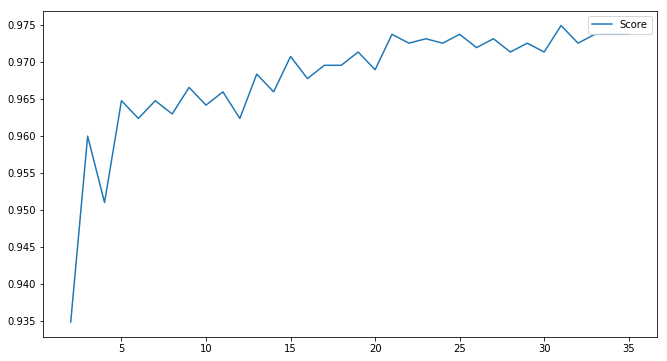

In [41]:
pred_scores = []
for i in range(2,36):
    rfc = RandomForestClassifier(n_estimators=i, random_state=111)
    rfc.fit(features_train, labels_train)
    pred = rfc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [42]:
df[df['Score'] == df['Score'].max()]

,Score
31,0.97488


### AdaBoost Classifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


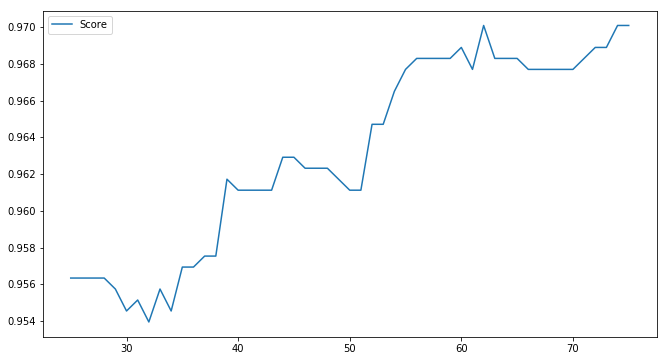

In [43]:
pred_scores = []
for i in range(25,76):
    abc = AdaBoostClassifier(n_estimators=i, random_state=111)
    abc.fit(features_train, labels_train)
    pred = abc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [44]:
df[df['Score'] == df['Score'].max()]

,Score
62,0.970096
74,0.970096
75,0.970096


### BaggingClassifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


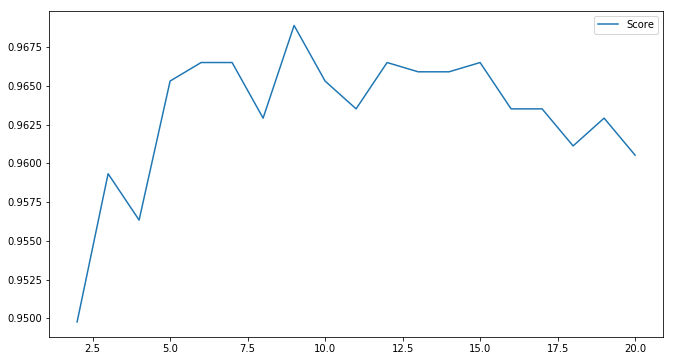

In [45]:
from sklearn.ensemble import BaggingClassifier
pred_scores = []
for i in range(2,21):
    bc = BaggingClassifier(n_estimators=i, random_state=111)
    bc.fit(features_train, labels_train)
    pred = bc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [46]:
df[df['Score'] == df['Score'].max()]

,Score
9,0.9689


### ExtraTreesClassifier

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


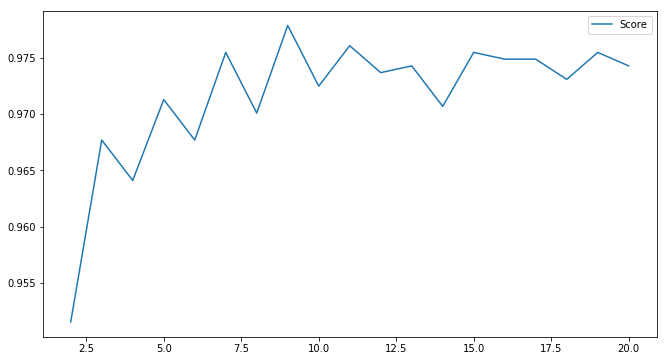

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
pred_scores = []
for i in range(2,21):
    etc = ExtraTreesClassifier(n_estimators=i, random_state=111)
    etc.fit(features_train, labels_train)
    pred = etc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [48]:
df[df['Score'] == df['Score'].max()]

,Score
9,0.977871
